# Singapore Travel Insurance Dataset 

Link - https://www.kaggle.com/datasets/mhdzahier/travel-insurance/

# Data Preparation and Cleaning

I will base my analysis on the following:

Agency
Destination
Duration
Age
Claim
Gender

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
insurance_df = pd.read_csv('travel insurance.csv')

In [5]:
insurance_df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


This dataset contains over 63000 cases with fields. Selecting a subset column with relevant data for the analysis.

In [6]:
preferred_columns = [
    'Agency',
    'Claim',
    'Duration',
    'Destination',
    'Gender',
    'Age'
]

In [8]:
travel_df = insurance_df[preferred_columns].copy()

In [9]:
travel_df

,Agency,Claim,Duration,Destination,Gender,Age
0,CBH,No,186,MALAYSIA,F,81
1,CBH,No,186,MALAYSIA,F,71
2,CWT,No,65,AUSTRALIA,NaN,32
3,CWT,No,60,AUSTRALIA,NaN,32
4,CWT,No,79,ITALY,NaN,41
...,...,...,...,...,...,...
63321,JZI,No,111,JAPAN,M,31
63322,JZI,No,58,CHINA,F,40
63323,JZI,No,2,MALAYSIA,M,57
63324,JZI,No,3,VIET NAM,M,63


In [10]:
travel_df.sample(20)

,Agency,Claim,Duration,Destination,Gender,Age
48153,EPX,No,294,MALAYSIA,NaN,36
19095,EPX,No,12,SINGAPORE,NaN,36
31053,CWT,No,18,MALAYSIA,NaN,37
46111,CWT,No,67,AUSTRALIA,NaN,31
40130,EPX,No,9,CHINA,NaN,36
56711,CWT,No,6,MALAYSIA,NaN,27
978,EPX,No,108,AUSTRALIA,NaN,36
17621,EPX,No,10,THAILAND,NaN,58
46726,C2B,No,22,SINGAPORE,F,63
7027,EPX,No,5,MALAYSIA,NaN,41


In [11]:
travel_df.describe()

,Duration,Age
count,63326.000000,63326.000000
mean,49.317074,39.969981
std,101.791566,14.017010
min,-2.000000,0.000000
25%,9.000000,35.000000
50%,22.000000,36.000000
75%,53.000000,43.000000
max,4881.000000,118.000000


## Exploratory Analysis and Visualization

Let's describe the data by computing mean, sum and mode of some columns.

What is the arithmetic mean of the age recorded.

In [14]:
travel_df.Age.mean()

39.969980734611376

In [15]:
travel_df.Duration.sum()

3123053

To know the gender with the highest number of insured persons lets use mode function.

In [17]:
travel_df.Gender.mode()

0    M
Name: Gender, dtype: object

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
travel_df

,Agency,Claim,Duration,Destination,Gender,Age
0,CBH,No,186,MALAYSIA,F,81
1,CBH,No,186,MALAYSIA,F,71
2,CWT,No,65,AUSTRALIA,NaN,32
3,CWT,No,60,AUSTRALIA,NaN,32
4,CWT,No,79,ITALY,NaN,41
...,...,...,...,...,...,...
63321,JZI,No,111,JAPAN,M,31
63322,JZI,No,58,CHINA,F,40
63323,JZI,No,2,MALAYSIA,M,57
63324,JZI,No,3,VIET NAM,M,63


 ## Agency

To look at the number of Agencies which were serviced more than the others, and plot the 16 Agencies with the highest number of insured persons. This can be done using the `value_counts` method.

In [20]:
Top_Agency = travel_df.Agency.value_counts().head(16)

In [21]:
Top_Agency

EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

To visualize this outcome using a bar chart.

In [22]:
travel_df.Agency.nunique()

16

In [24]:
Destination_counts =travel_df.Destination.value_counts().head(20)

In [25]:
Destination_counts

SINGAPORE                    13255
MALAYSIA                      5930
THAILAND                      5894
CHINA                         4796
AUSTRALIA                     3694
INDONESIA                     3452
UNITED STATES                 2530
PHILIPPINES                   2490
HONG KONG                     2411
INDIA                         2251
JAPAN                         2061
VIET NAM                      1669
KOREA, REPUBLIC OF            1479
UNITED KINGDOM                1309
TAIWAN, PROVINCE OF CHINA     1090
MYANMAR                        806
BRUNEI DARUSSALAM              780
NEW ZEALAND                    537
CANADA                         528
CAMBODIA                       493
Name: Destination, dtype: int64

Let's visualize this on a pie chart.

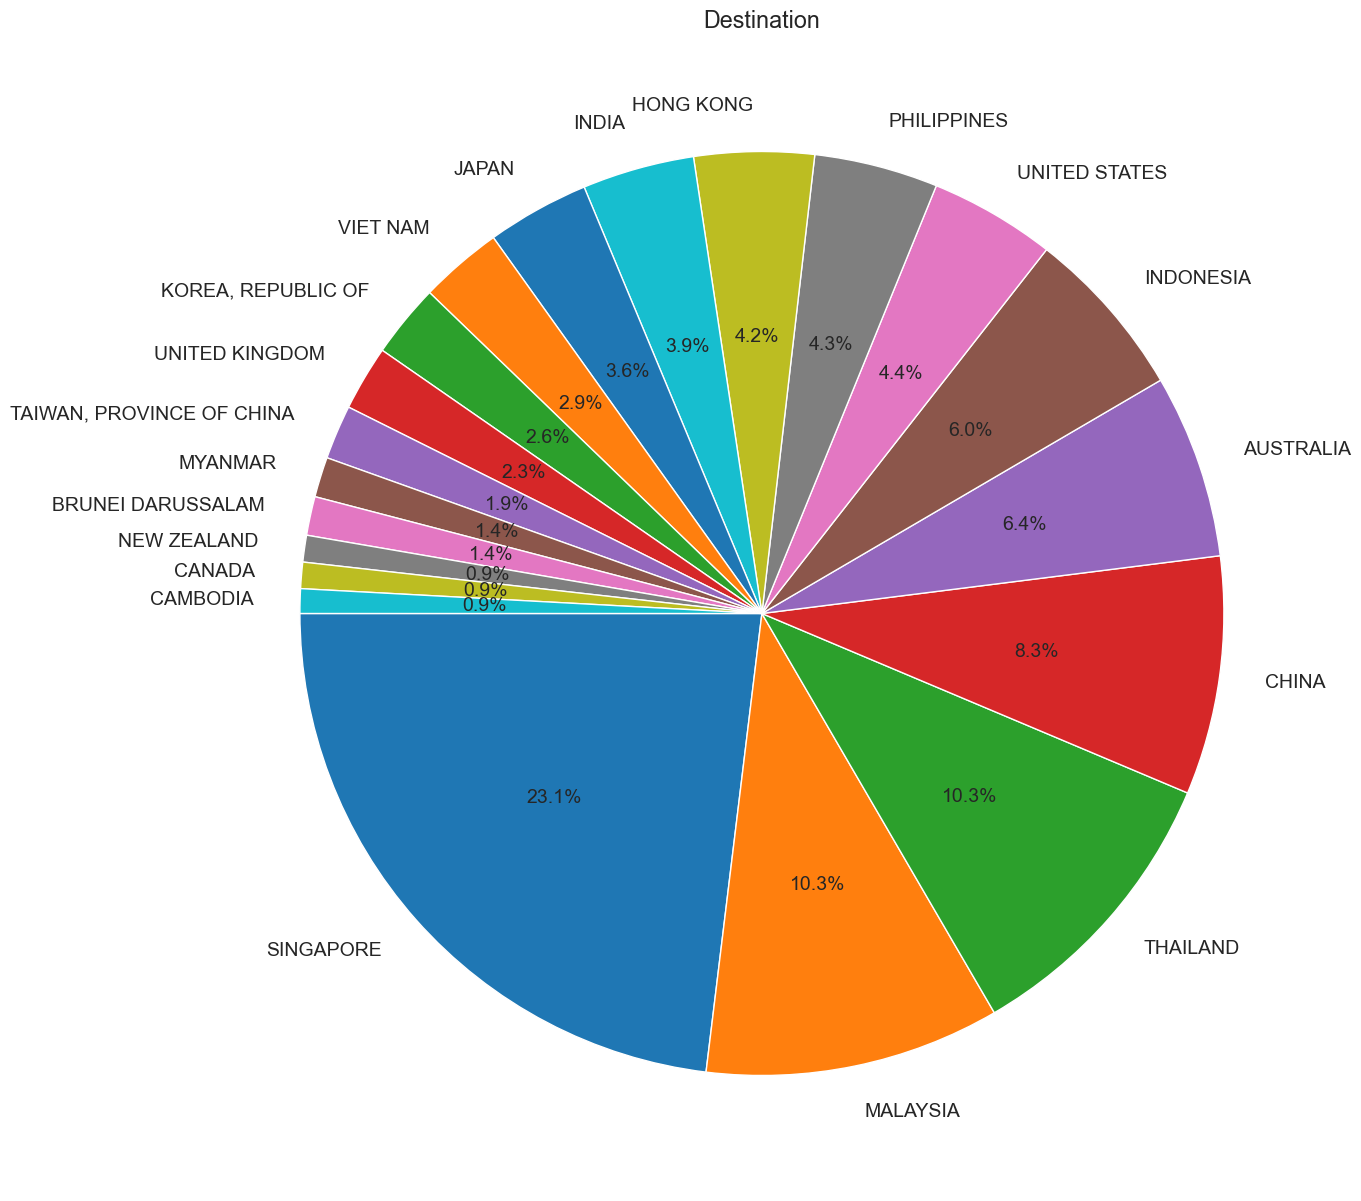

In [26]:
plt.figure(figsize=(30,15))
plt.title('Destination')
plt.pie(Destination_counts, labels=Destination_counts.index, autopct='%1.1f%%', startangle=180);


## Gender
Let's check the gender of the insured persons.

Text(0.5, 0, 'count')

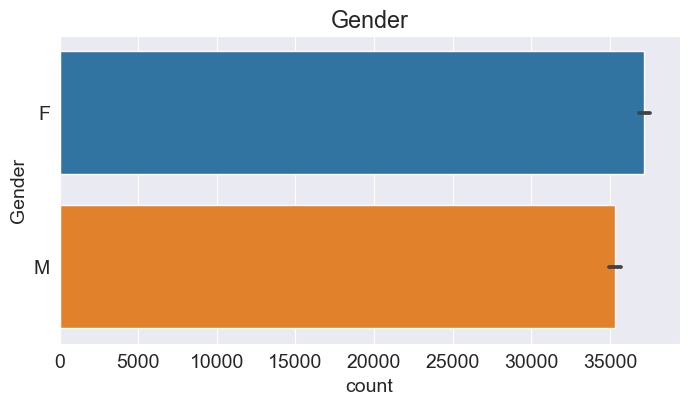

In [27]:
plt.figure(figsize=(8, 4))
sns.barplot(y=travel_df.Gender, x=travel_df.index)
plt.title("Gender");
plt.xlabel('count')

## Inferences and Conclusion
We've drawn many interesting inferences from the survey, here's a summary of the few of them:

>- Based on the Agency we can see the different agencies offering travel insurance to people and the edge of one over the other.
>- The Destination is not as diverse as it can be, their some destinations mostly preferred by the insured persons as it clearly given in the analysis.
>- Most insured persons are within the age 20-80, although a little number of people insured are 120 years of Age.
>- The duration of the insurance varies from one person to another.
>- Most insurance claim have not been done yet compared to the ones already claimed.
    You can enrol for travel insurance at any age, and majority of the insured persons have not claimed the insurance fund.